In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados = pd.read_csv(uri)
dados = dados.rename(columns={
    "mileage_per_year":"milhas_por_ano",
    "model_year":"ano_do_modelo",
    "price":"preco",
    "sold":"vendido"
})

dados.vendido = dados.vendido.map({
    "yes":1,
    "no":0

})

dados['idade_do_modelo'] = datetime.today().year - dados.ano_do_modelo
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados = dados.drop(columns = ["Unnamed: 0","milhas_por_ano","ano_do_modelo"])
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [2]:
x = dados[["preco","idade_do_modelo","km_por_ano"]]
y = dados["vendido"]

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

seed = 5
np.random.seed(seed)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y,random_state= seed,test_size= 0.25,stratify = y)


scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)
print("treino com %d elementos e testes com %d elementos" % (len(treino_x),len(treino_y)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y,previsoes)
print("Acuracia de teste : %.2f%%" % (acuracia * 100))

treino com 7500 elementos e testes com 7500 elementos
Acuracia de teste : 76.84%


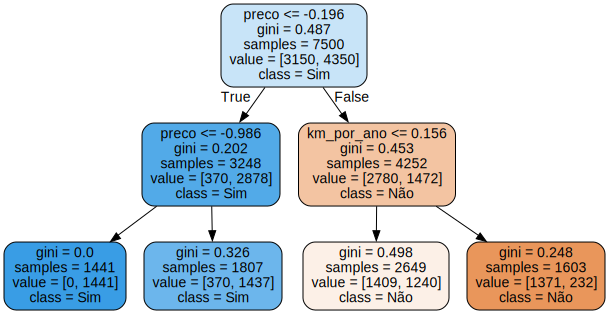

In [12]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(
    modelo,
    out_file=None,
    feature_names=features,
    filled=True,
    rounded=True,
    class_names=["Não","Sim"])
grafico = graphviz.Source(dot_data)
grafico

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

seed = 5
np.random.seed(seed)

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y,random_state= seed,test_size= 0.25,stratify = y)



print("treino com %d elementos e testes com %d elementos" % (len(treino_x),len(treino_y)))

modelo = DecisionTreeClassifier(max_depth=2)
modelo.fit(raw_treino_x,treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y,previsoes)
print("Acuracia de teste : %.2f%%" % (acuracia * 100))

treino com 7500 elementos e testes com 7500 elementos
Acuracia de teste : 76.84%


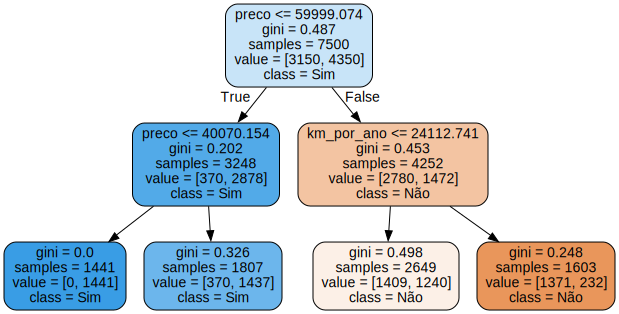

In [14]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(
    modelo,
    out_file=None,
    feature_names=features,
    filled=True,
    rounded=True,
    class_names=["Não","Sim"])
grafico = graphviz.Source(dot_data)
grafico

#samples = quantos dados estão sendo analisados